### 4.Seaborn

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus']=False

In [2]:
iris = sns.load_dataset("iris")    # 붓꽃 데이터
titanic = sns.load_dataset("titanic")    # 타이타닉호 데이터
tips = sns.load_dataset("tips")    # 팁 데이터
flights = sns.load_dataset("flights")    # 여객운송 데이터
mpg =sns.load_dataset('mpg')          #mile per gallon 데이터

- 1차원 분포

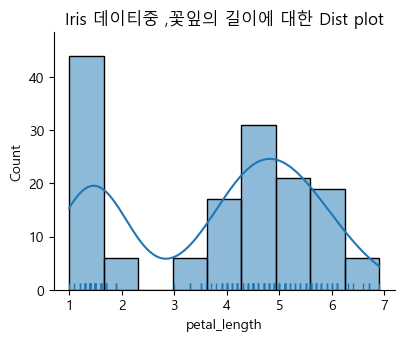

In [3]:
# distpolt(distribution plot) 분포 그림
fig=sns.displot(x='petal_length',rug=True,kde=True,data=iris)
fig.fig.set_size_inches(4,3)
plt.title('Iris 데이티중 ,꽃잎의 길이에 대한 Dist plot')
plt.show()

- 카운트 플롯

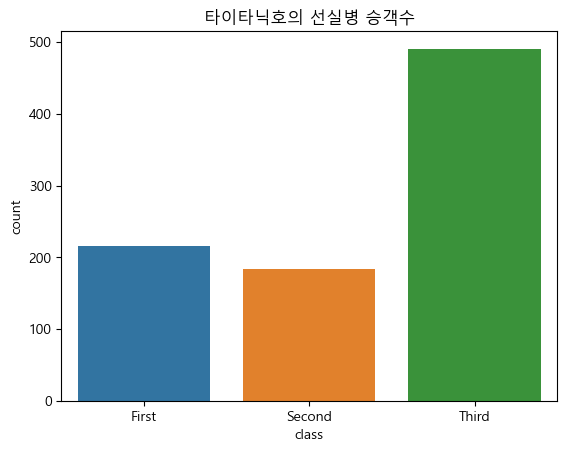

In [4]:
sns.countplot(x='class',data=titanic)
plt.title('타이타닉호의 선실병 승객수')
plt.show()

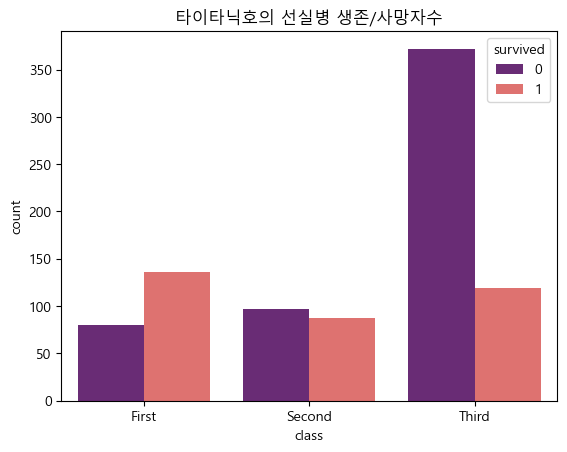

In [5]:
#그룹핑
sns.countplot(x='class',hue='survived',data=titanic,palette='magma') # palette,hue따라서 그림을 다르게
plt.title('타이타닉호의 선실병 생존/사망자수')
plt.show()

- 2차원 실수 데이터

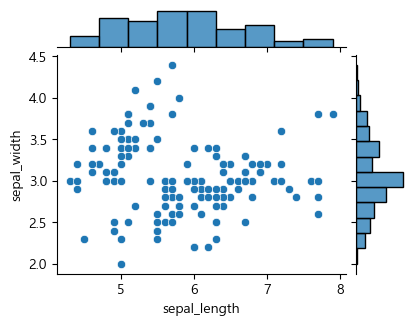

In [6]:
#joint plot
fig=sns.jointplot(x='sepal_length',y='sepal_width',data=iris)
fig.fig.set_size_inches(4,3)
plt.show()

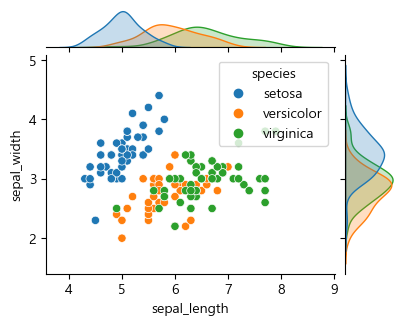

In [7]:
#joint plot를 좀더 세련되게
fig=sns.jointplot(x='sepal_length',y='sepal_width',hue='species',data=iris)
fig.fig.set_size_inches(4,3)
plt.show()

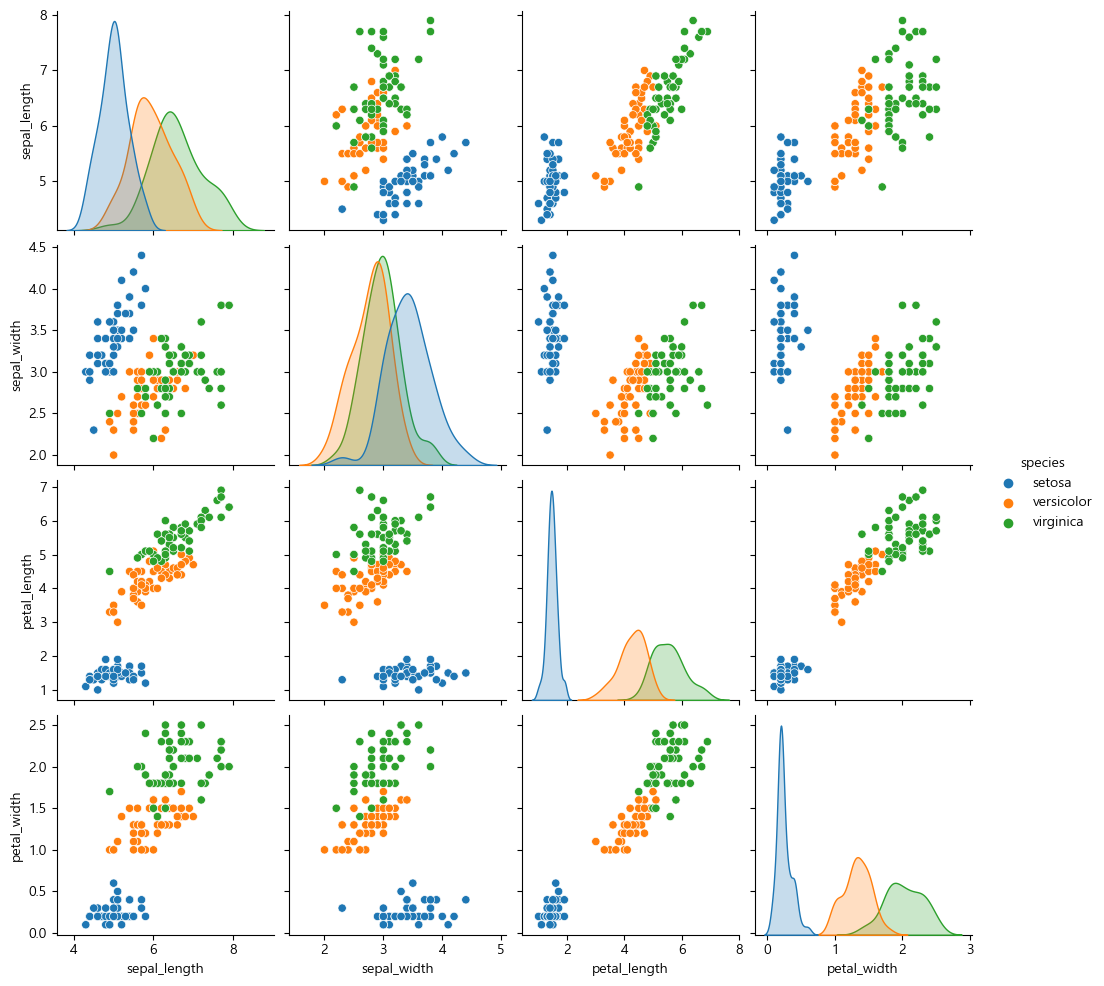

In [8]:
#pair plot
sns.pairplot(hue='species',data=iris)      #plt.show() 안쓰고 ; 써도됨
plt.show()


- 다차원 카테고리 데이터

In [9]:
#heatmap
dt = titanic.pivot_table('survived','class','sex','count')
dt

sex,female,male
class,,
First,94,122
Second,76,108
Third,144,347


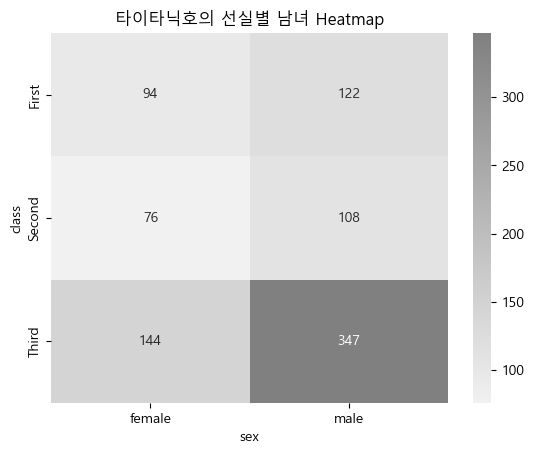

In [10]:
sns.heatmap(dt, cmap=sns.light_palette("gray", as_cmap=True),
            annot=True, fmt='d')
plt.title('타이타닉호의 선실별 남녀 Heatmap')
plt.show()

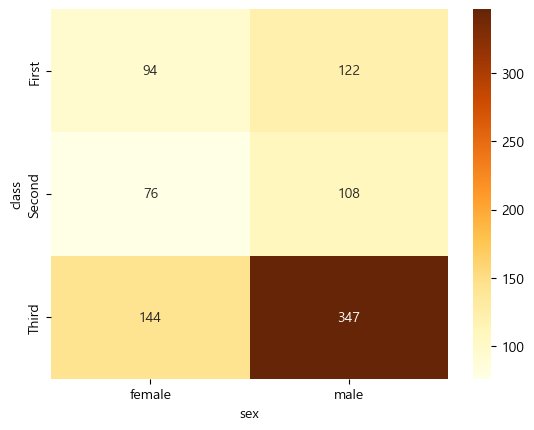

In [11]:
sns.heatmap(dt,cmap='YlOrBr',annot=True,fmt='d')
plt.title=('타이타닉호의 선실별 남녀 heatmap');

In [12]:
print(flights.shape)
flights.head()

(144, 3)


,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


TypeError: 'str' object is not callable

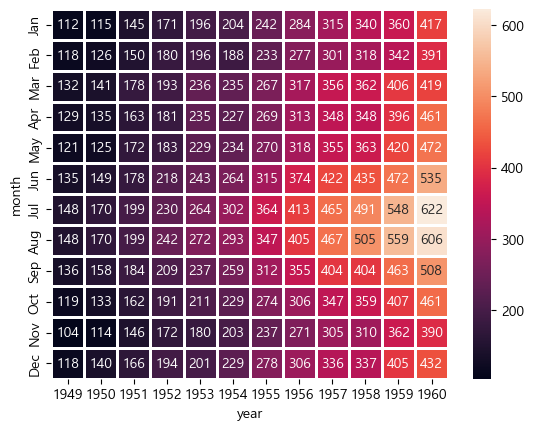

In [13]:
passengers = flights.pivot(index='month',columns='year',values='passengers')
sns.heatmap(passengers,annot=True,fmt='d',linewidths=1)
plt.title('연도별,월별 비행기 승객수');

- 다차원 복합 데이터(2차원)

TypeError: 'str' object is not callable

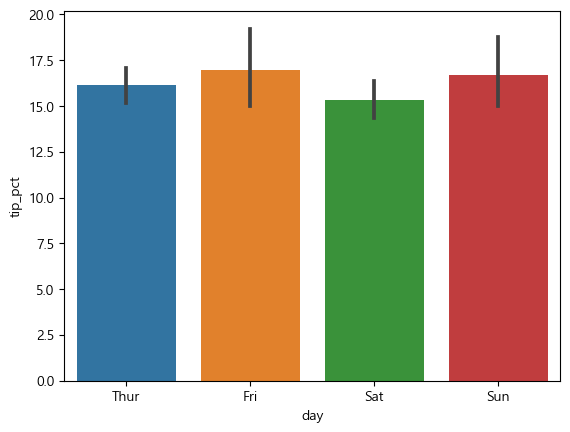

In [ ]:
tips['tip_pct'] = (tips.tip / tips.total_bill * 100).round(2)
sns.barplot(x ='day', y='tip_pct',data=tips)
plt.title('요일별 팁 평균');

In [ ]:
print(mpg.shape)
mpg.head()

(398, 9)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [ ]:
#제조사만 가져오기
mpg['manufacturer'] =mpg.name.apply(lambda x : x.split()[0])
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,manufacturer
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,chevrolet
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,buick
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite,plymouth
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst,amc
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino,ford


TypeError: 'str' object is not callable

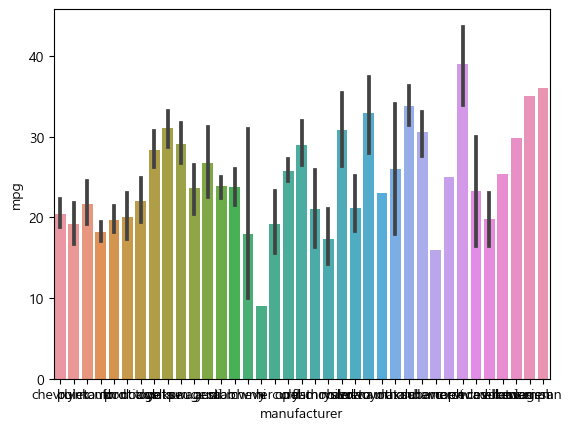

In [ ]:
sns.barplot(x = 'manufacturer',y='mpg',data=mpg)
plt.title('제조사별 평균 MPG');

TypeError: 'str' object is not callable

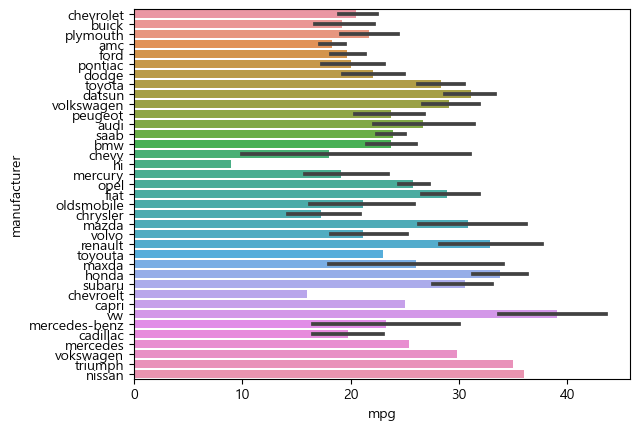

In [ ]:
# x와 y를 바꿔주면 수평막대그래프가 됨
sns.barplot(y = 'manufacturer',x='mpg',data=mpg)
plt.title('제조사별 평균 MPG');

- boxplot

AttributeError: 'Axes' object has no attribute 'fig'

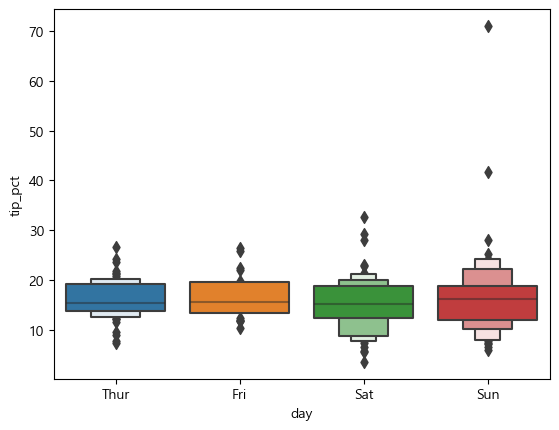

In [ ]:
#요일별 팁의 비율
sns.boxenplot(x='day',y='tip_pct',data=tips)
plt.title('요일별 팁 비율에 대한 boxplot');

TypeError: 'str' object is not callable

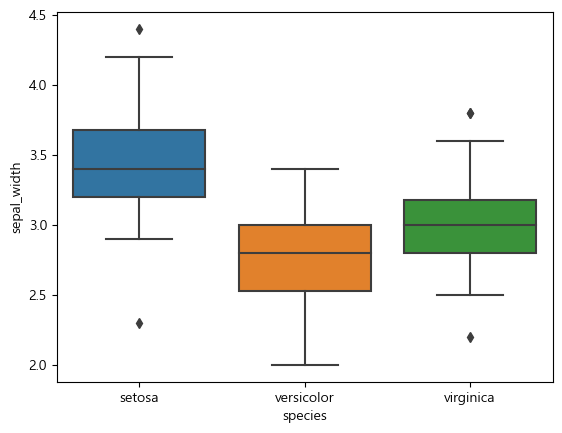

In [ ]:
# iris 
sns.boxplot(x='species', y='sepal_width', data=iris)
plt.title('Iris 품종별 Sepal width');

<Axes: >

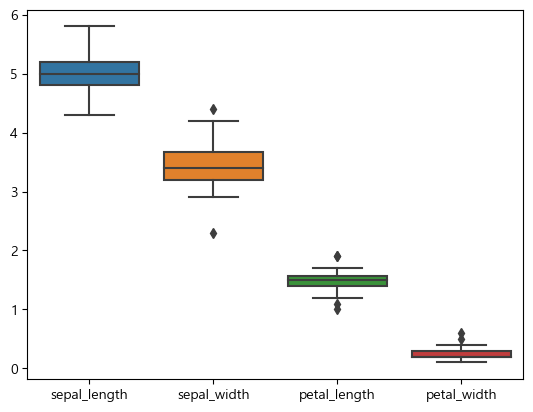

In [ ]:
sns.boxplot(data=iris[iris.species == 'setosa'])

TypeError: 'str' object is not callable

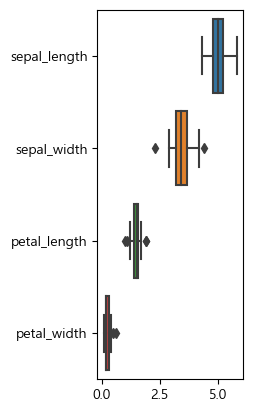

In [ ]:
for i, species in enumerate(iris.species.unique()):
    plt.subplot(1,3,i+1)
    sns.boxplot(data=iris[iris.species == species], orient='horizontal')
    plt.title(species)
plt.show()

- regpolt

In [ ]:
ans = sns.load_dataset('anscombe')
ans.head(3)

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58


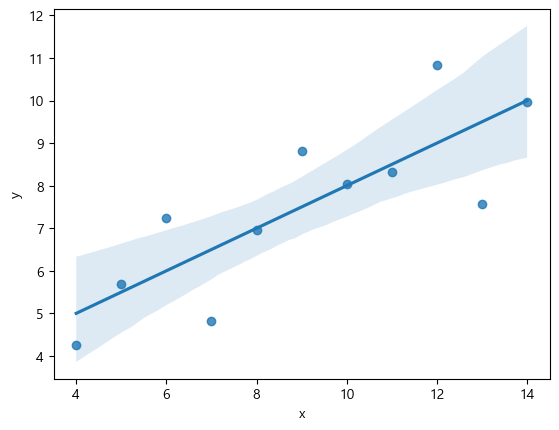

In [ ]:
sns.regplot(x='x',y='y',data=ans[ans.dataset == 'I']);

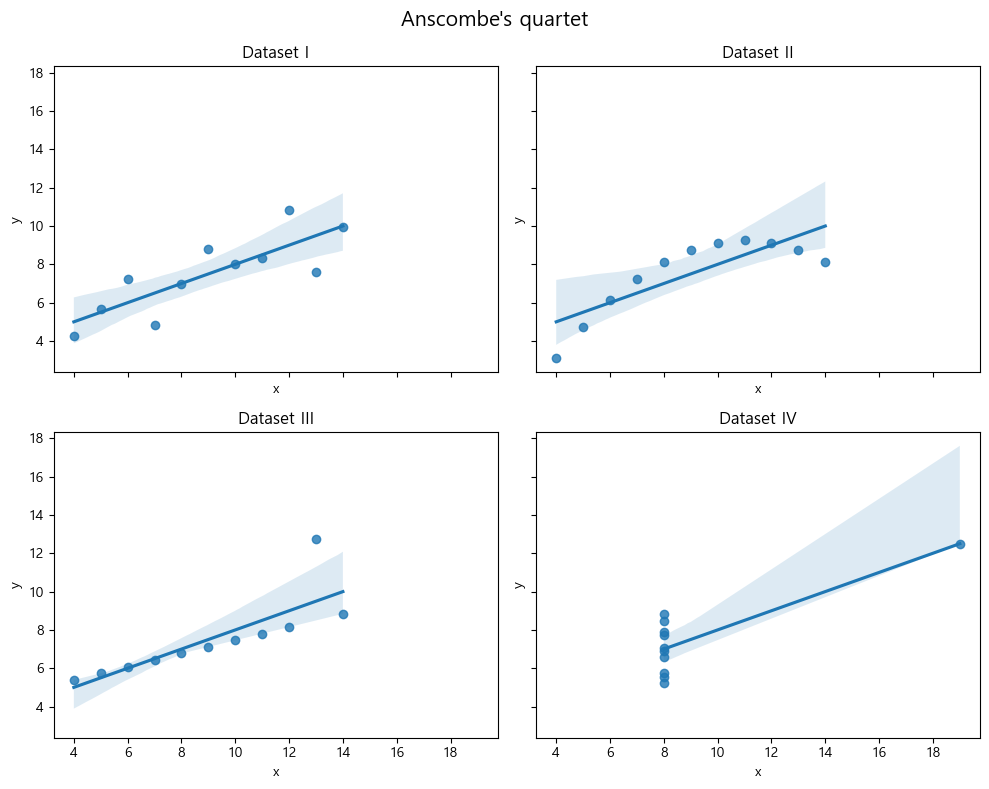

In [ ]:
fig, axes = plt.subplots(2, 2,figsize=(10,8),sharex=True, sharey=True)
for i, roman in enumerate(ans.dataset.unique()):
    row, col = i // 2, i % 2
    ax =axes[i //2,i % 2]
    
    sns.regplot(x='x', y='y', data=ans[ans.dataset == roman], ax=ax)
    ax.set_title(f'Dataset {roman}')
fig.suptitle("Anscombe's quartet",fontsize =15)
plt.tight_layout()
plt.show()

- 1) Titanic
    - embark-town ,sex 생존율
    - 나이 = displot
- 2) CCTV
    - 자치구 법정준
    - 자치구 이름
    - cctv 갯수

In [ ]:
#  embark-town ,sex 생존율
dt = titanic.pivot_table('survived','embark_town','sex')*100
dt

sex,female,male
embark_town,,
Cherbourg,87.671233,30.526316
Queenstown,75.000000,7.317073
Southampton,68.965517,17.460317


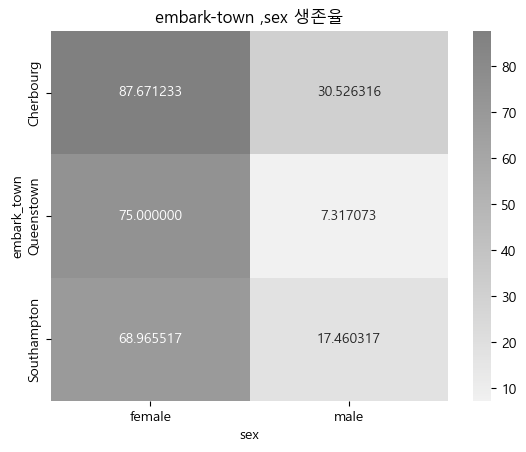

In [ ]:
sns.heatmap(dt, cmap=sns.light_palette("gray", as_cmap=True),
            annot=True, fmt='f')
plt.title('embark-town ,sex 생존율')
plt.show()


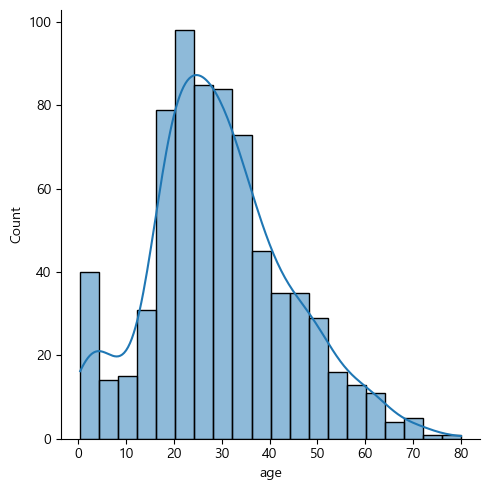

In [ ]:
#나이 = displot
sns.displot(x='age',data=titanic,kde=True)

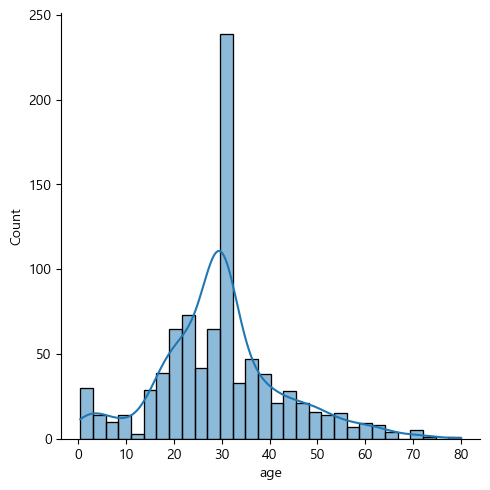

In [ ]:
# 결측치를 평균으로 변경
titanic.age.fillna(titanic.age.mean(),inplace=True)
sns.displot(x='age',data=titanic,kde=True)

In [1]:
pail='../02.Pandas/과제/data/서울시 자치구 년도별 CCTV 설치 현황_221231기준 copy.csv'
columns = '구분,총계'.split(',')
cctv = pd.read_csv(pail, encoding='euc=kr', thousands=',')
cctv = cctv[columns]
cctv.drop([0],inplace=True)
cctv.rename(columns={'구분':'자치구'},inplace=True)
cctv.head()

NameError: name 'pd' is not defined

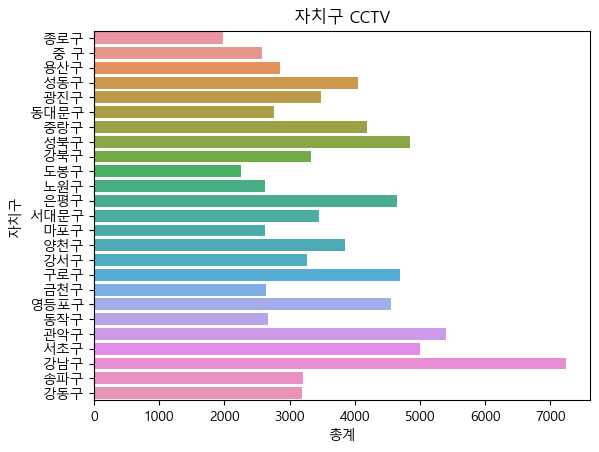

In [ ]:
#Unsorted
sns.barplot(x='총계',y='자치구',data=cctv)
plt.title('자치구 CCTV')
plt.show()

In [ ]:
# 2. 자치구 이름으로 정렬
si = cctv.sort_values(by='자치구')
sns.barplot(x='총계', y='자치구', data=si)
plt.title('자치구별 CCTV 설치대수(자치구명으로 정렬)');

NameError: name 'cctv' is not defined

In [ ]:
# 3. 설치대수로 정렬
sv = cctv.sort_values(by='총계', ascending=False)
sns.barplot(y='자치구', x='총계', data=sv)
plt.title('자치구별 CCTV 설치대수(설치대수로 정렬)');